In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
numb_x_src_path = '../../Dataset/MixedDataSetAdded.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst2.xlsx'

In [3]:
numb_data = pd.read_json(numb_x_src_path)
numb_data = numb_data.iloc[:, :-59022]

In [4]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [5]:
X_N = np.nan_to_num(numb_data.values, nan=0, copy=True).astype(int)
y = plagiarised_array

In [6]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.2, random_state=32)

In [7]:
# scaler = StandardScaler()
# X_N_train = scaler.fit_transform(X_N_train)
# X_N_test = scaler.fit_transform(X_N_test)

In [8]:
numbP = Perceptron()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

Training data score: 0.9459459459459459
Test data score: 0.8928571428571429


In [20]:
NPH = 32
DROPOUT_RATE = 0.5
numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dropout(DROPOUT_RATE),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()
LR = 0.0001
optimizer = keras.optimizers.Adam(learning_rate=LR)

numb_model.compile(optimizer=optimizer, loss=LOSS_FN, metrics=['accuracy'])

history = numb_model.fit(X_N_train, y_N_train, epochs=100, validation_data=(X_N_test, y_N_test))

y_pred_numb_binary_flat = (numb_model.predict(X_N_test).flatten() > 0.5).astype(int)

Epoch 1/100
4/4 [==============================] - 1s 53ms/step - loss: 79.0415 - accuracy: 0.7027 - val_loss: 50.5040 - val_accuracy: 0.7500
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 98.1976 - accuracy: 0.6667 - val_loss: 48.4150 - val_accuracy: 0.7500
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 107.5800 - accuracy: 0.6847 - val_loss: 71.6755 - val_accuracy: 0.7857
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 103.4319 - accuracy: 0.7838 - val_loss: 45.8349 - val_accuracy: 0.7857
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 45.4490 - accuracy: 0.8468 - val_loss: 13.7274 - val_accuracy: 0.8571
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 42.2316 - accuracy: 0.6757 - val_loss: 6.8946 - val_accuracy: 0.8214
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 61.0420 - accuracy: 0.5495 - val_loss: 7.3499 - val_accuracy: 0.8214
Epoch 

In [10]:
# numb_model.summary()
# numb_model.save("scaled_model.h5")
# config = optimizer.get_config()

# # Extract and print the learning rate
# learning_rate = config['learning_rate']
# print("Default learning rate:", learning_rate)


In [11]:
# for numb, percep, actual in zip(y_pred_numb_binary_flat, percepPredict, y_N_test):
#     print(f"Number: {numb}, Perceptron: {percep} Actual: {actual}")

In [12]:
print(numb_model.evaluate(X_N_test,y_N_test)[1])
#numb_model.save("haldmodel.h5")

1/1 [==============================] - 0s 21ms/step - loss: 0.5734 - accuracy: 0.8929
0.8928571343421936


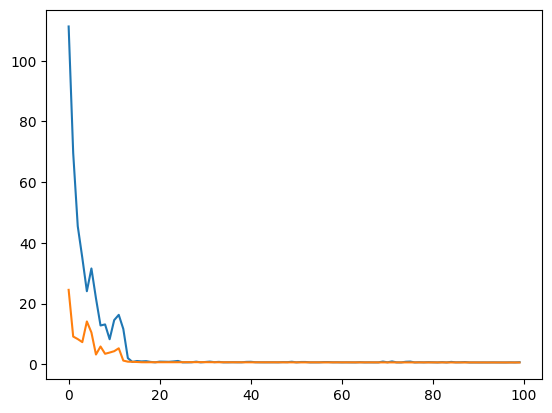

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

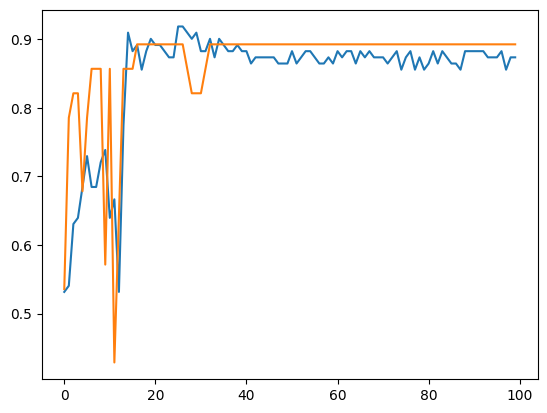

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])